In [1]:
import uproot
import awkward as ak #The events object is an awkward array
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist
import pickle #to save histograms

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

# Processors (for parallelization)
#import coffea.processor as processor
from coffea import processor

#Math
import math

#Numpy
import numpy as np

In [2]:
lumi_2018 = 59.74 #fb-1

#Signal cross sections (pb)
xs_sig_PHML = 0.9107 #sig_WPHADWMLEPjj_EWK
xs_sig_MHPL = 0.9114 #sig_WPLEPWMHADjj_EWK
xs_sig_PLZH = 0.1825 #sig_WPLEPZHADjj_EWK
xs_sig_MLZH = 0.1000 #sig_WMLEPZHADjj_EWK
xs_sig_PLPH = 0.0879 #sig_WPLEPWPHADjj_EWK
xs_sig_MLMH = 0.0326 #sig_WMLEPWMHADjj_EWK

#Background W+Jets cross sections
xs_WJets_LO = 61526.7 #pb
x1 = xs_WJets_70To100 = 1292.0
x2 = xs_WJets_100To200 = 1395.0
x3 = xs_WJets_200To400 = 407.9
x4 = xs_WJets_400To600 = 57.48
x5 = xs_WJets_600To800 = 18.77
x6 = xs_WJets_800To1200 = 5.366
x7 = xs_WJets_1200To2500 = 1.074
x8 = xs_WJets_2500ToInf = 0.008001

#Load output of the generetor from file.pkl
with open("output.pkl", "rb") as file_output:
    out = pickle.load(file_output)
file_output.close()

#Numbers of events generated
n_sig_PHML = out["sig_WPHADWMLEPjj_EWK"]["gen_events"]
n_sig_MHPL = out["sig_WPLEPWMHADjj_EWK"]["gen_events"]
n_sig_PLZH = out["sig_WPLEPZHADjj_EWK"]["gen_events"]
n_sig_MLZH = out["sig_WMLEPZHADjj_EWK"]["gen_events"]
n_sig_PLPH = out["sig_WPLEPWPHADjj_EWK"]["gen_events"]
n_sig_MLMH = out["sig_WMLEPWMHADjj_EWK"]["gen_events"]
n_bkg_LO = out["bkg_WJets_LO"]["gen_events"]
n1 = out["bkg_WJets_70To100"]["gen_events"]
n2 = out["bkg_WJets_100To200"]["gen_events"]
n3 = out["bkg_WJets_200To400"]["gen_events"]
n4 = out["bkg_WJets_400To600"]["gen_events"]
n5 = out["bkg_WJets_600To800"]["gen_events"]
n6 = out["bkg_WJets_800To1200"]["gen_events"]
n7 = out["bkg_WJets_1200To2500"]["gen_events"]
n8 = out["bkg_WJets_2500ToInf"]["gen_events"]
print(n_sig_PHML, n_sig_PHML, n_sig_PLZH, n_sig_MLZH, n_sig_PLPH, n_sig_MLMH, n_bkg_LO, n1+n2+n3+n4+n5+n6+n7+n8)

982500 982500 931000 987000 966000 967500 81051269 226499572


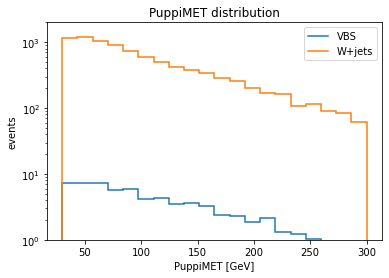

In [3]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["PuppiMET"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["PuppiMET"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["PuppiMET"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["PuppiMET"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["PuppiMET"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["PuppiMET"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["PuppiMET"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["PuppiMET"]*(x1/n1)+out["bkg_WJets_100To200"]["PuppiMET"]*(x2/n2)+out["bkg_WJets_200To400"]["PuppiMET"]*(x3/n3)+out["bkg_WJets_400To600"]["PuppiMET"]*(x4/n4)+out["bkg_WJets_600To800"]["PuppiMET"]*(x5/n5)+out["bkg_WJets_800To1200"]["PuppiMET"]*(x6/n6)+out["bkg_WJets_1200To2500"]["PuppiMET"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["PuppiMET"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("PuppiMET [GeV]")
plt.ylim(1,2e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("PuppiMET distribution")
plt.legend()
plt.savefig("figures/PuppiMET.png")

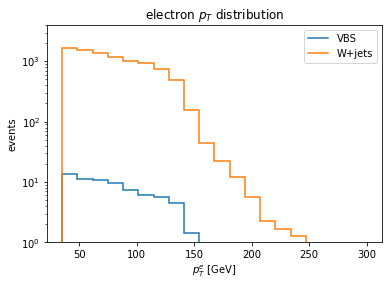

In [4]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["e_pT"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["e_pT"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["e_pT"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["e_pT"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["e_pT"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["e_pT"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["e_pT"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["e_pT"]*(x1/n1)+out["bkg_WJets_100To200"]["e_pT"]*(x2/n2)+out["bkg_WJets_200To400"]["e_pT"]*(x3/n3)+out["bkg_WJets_400To600"]["e_pT"]*(x4/n4)+out["bkg_WJets_600To800"]["e_pT"]*(x5/n5)+out["bkg_WJets_800To1200"]["e_pT"]*(x6/n6)+out["bkg_WJets_1200To2500"]["e_pT"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["e_pT"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$p_{T}^{e}$ [GeV]")
plt.ylim(1,4e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("electron $p_{T}$ distribution")
plt.legend()
plt.savefig("figures/electron_pT.png")

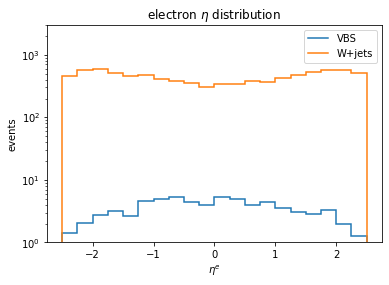

In [5]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["e_eta"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["e_eta"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["e_eta"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["e_eta"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["e_eta"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["e_eta"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["e_eta"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["e_eta"]*(x1/n1)+out["bkg_WJets_100To200"]["e_eta"]*(x2/n2)+out["bkg_WJets_200To400"]["e_eta"]*(x3/n3)+out["bkg_WJets_400To600"]["e_eta"]*(x4/n4)+out["bkg_WJets_600To800"]["e_eta"]*(x5/n5)+out["bkg_WJets_800To1200"]["e_eta"]*(x6/n6)+out["bkg_WJets_1200To2500"]["e_eta"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["e_eta"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$\eta^{e}$")
plt.ylim(1,3e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("electron $\eta$ distribution")
plt.legend()
plt.savefig("figures/electron_eta.png")

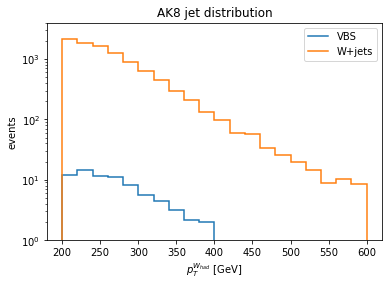

In [6]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["fatjet_pT"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["fatjet_pT"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["fatjet_pT"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["fatjet_pT"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["fatjet_pT"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["fatjet_pT"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["fatjet_pT"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["fatjet_pT"]*(x1/n1)+out["bkg_WJets_100To200"]["fatjet_pT"]*(x2/n2)+out["bkg_WJets_200To400"]["fatjet_pT"]*(x3/n3)+out["bkg_WJets_400To600"]["fatjet_pT"]*(x4/n4)+out["bkg_WJets_600To800"]["fatjet_pT"]*(x5/n5)+out["bkg_WJets_800To1200"]["fatjet_pT"]*(x6/n6)+out["bkg_WJets_1200To2500"]["fatjet_pT"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["fatjet_pT"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$p_{T}^{W_{had}}$ [GeV]")
plt.ylim(1,4e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("AK8 jet distribution")
plt.legend()
plt.savefig("figures/AK8_pT.png")

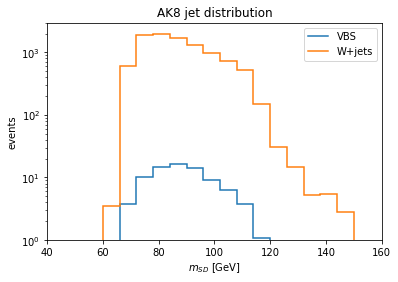

In [7]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["fatjet_mass"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["fatjet_mass"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["fatjet_mass"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["fatjet_mass"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["fatjet_mass"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["fatjet_mass"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["fatjet_mass"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["fatjet_mass"]*(x1/n1)+out["bkg_WJets_100To200"]["fatjet_mass"]*(x2/n2)+out["bkg_WJets_200To400"]["fatjet_mass"]*(x3/n3)+out["bkg_WJets_400To600"]["fatjet_mass"]*(x4/n4)+out["bkg_WJets_600To800"]["fatjet_mass"]*(x5/n5)+out["bkg_WJets_800To1200"]["fatjet_mass"]*(x6/n6)+out["bkg_WJets_1200To2500"]["fatjet_mass"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["fatjet_mass"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$m_{SD}$ [GeV]")
plt.xlim(40,160)
plt.ylim(1,3e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("AK8 jet distribution")
plt.legend()
plt.savefig("figures/AK8_mass.png")

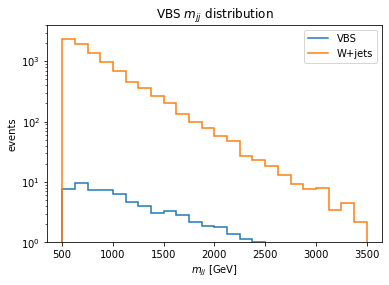

In [8]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["jets_mass"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["jets_mass"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["jets_mass"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["jets_mass"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["jets_mass"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["jets_mass"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["jets_mass"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["jets_mass"]*(x1/n1)+out["bkg_WJets_100To200"]["jets_mass"]*(x2/n2)+out["bkg_WJets_200To400"]["jets_mass"]*(x3/n3)+out["bkg_WJets_400To600"]["jets_mass"]*(x4/n4)+out["bkg_WJets_600To800"]["jets_mass"]*(x5/n5)+out["bkg_WJets_800To1200"]["jets_mass"]*(x6/n6)+out["bkg_WJets_1200To2500"]["jets_mass"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["jets_mass"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$m_{jj}$ [GeV]")
plt.ylim(1,4e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("VBS $m_{jj}$ distribution")
plt.legend()
plt.savefig("figures/VBS_mass.png")

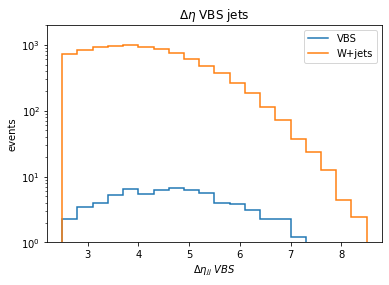

In [9]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["jets_eta"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["jets_eta"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["jets_eta"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["jets_eta"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["jets_eta"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["jets_eta"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["jets_eta"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["jets_eta"]*(x1/n1)+out["bkg_WJets_100To200"]["jets_eta"]*(x2/n2)+out["bkg_WJets_200To400"]["jets_eta"]*(x3/n3)+out["bkg_WJets_400To600"]["jets_eta"]*(x4/n4)+out["bkg_WJets_600To800"]["jets_eta"]*(x5/n5)+out["bkg_WJets_800To1200"]["jets_eta"]*(x6/n6)+out["bkg_WJets_1200To2500"]["jets_eta"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["jets_eta"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$\Delta\eta_{jj} \ VBS$")
plt.ylim(1,2e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("$\Delta\eta$ VBS jets")
plt.legend()
plt.savefig("figures/VBS_eta.png")

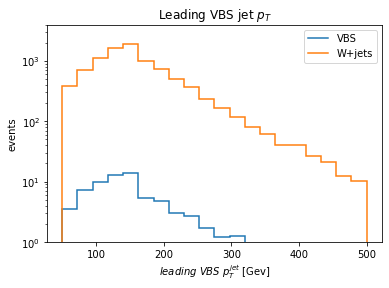

In [10]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["jets_lead"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["jets_lead"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["jets_lead"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["jets_lead"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["jets_lead"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["jets_lead"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["jets_lead"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["jets_lead"]*(x1/n1)+out["bkg_WJets_100To200"]["jets_lead"]*(x2/n2)+out["bkg_WJets_200To400"]["jets_lead"]*(x3/n3)+out["bkg_WJets_400To600"]["jets_lead"]*(x4/n4)+out["bkg_WJets_600To800"]["jets_lead"]*(x5/n5)+out["bkg_WJets_800To1200"]["jets_lead"]*(x6/n6)+out["bkg_WJets_1200To2500"]["jets_lead"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["jets_lead"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$leading \ VBS \ p_{T}^{jet}$ [Gev]")
plt.ylim(1,4e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("Leading VBS jet $p_{T}$")
plt.legend()
plt.savefig("figures/VBS_leading.png")

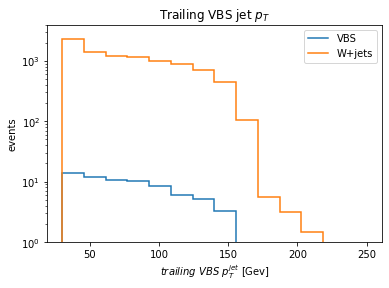

In [11]:
(lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["jets_trail"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["jets_trail"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["jets_trail"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["jets_trail"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["jets_trail"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["jets_trail"]*(xs_sig_MLMH/n_sig_MLMH))).plot(label="VBS")
#(lumi_2018*1000*out["bkg_WJets_LO"]["jets_trail"]*xs_WJets_LO/n_bkg_LO).plot(label="W+jets_LO")
(lumi_2018*1000*(out["bkg_WJets_70To100"]["jets_trail"]*(x1/n1)+out["bkg_WJets_100To200"]["jets_trail"]*(x2/n2)+out["bkg_WJets_200To400"]["jets_trail"]*(x3/n3)+out["bkg_WJets_400To600"]["jets_trail"]*(x4/n4)+out["bkg_WJets_600To800"]["jets_trail"]*(x5/n5)+out["bkg_WJets_800To1200"]["jets_trail"]*(x6/n6)+out["bkg_WJets_1200To2500"]["jets_trail"]*(x7/n7)+out["bkg_WJets_2500ToInf"]["jets_trail"]*(x8/n8))).plot(label="W+jets")
plt.xlabel("$trailing \ VBS \ p_{T}^{jet}$ [Gev]")
plt.ylim(1,4e3)
plt.ylabel("events")
plt.yscale("log")
plt.title("Trailing VBS jet $p_{T}$")
plt.legend()
plt.savefig("figures/VBS_trailing.png")

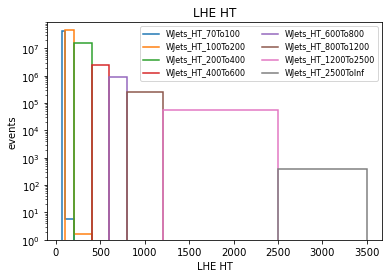

In [12]:
#Instead of the W+jets_LO inclusive sample, I use the HT binned samples
#(out["bkg_WJets_LO"]["LHE_HT"]*lumi_2018*1000*xs_WJets_LO/out["bkg_WJets"]["entries"]).plot()
h_HT_1 = out["bkg_WJets_70To100"]["LHE_HT"]*lumi_2018*1000*x1/n1
h_HT_2 = out["bkg_WJets_100To200"]["LHE_HT"]*lumi_2018*1000*x2/n2
h_HT_3 = out["bkg_WJets_200To400"]["LHE_HT"]*lumi_2018*1000*x3/n3
h_HT_4 = out["bkg_WJets_400To600"]["LHE_HT"]*lumi_2018*1000*x4/n4
h_HT_5 = out["bkg_WJets_600To800"]["LHE_HT"]*lumi_2018*1000*x5/n5
h_HT_6 = out["bkg_WJets_800To1200"]["LHE_HT"]*lumi_2018*1000*x6/n6
h_HT_7 = out["bkg_WJets_1200To2500"]["LHE_HT"]*lumi_2018*1000*x7/n7
h_HT_8 = out["bkg_WJets_2500ToInf"]["LHE_HT"]*lumi_2018*1000*x8/n8
h_HT_1.plot(label="WJets_HT_70To100"), h_HT_2.plot(label="WJets_HT_100To200"), h_HT_3.plot(label="WJets_HT_200To400"), h_HT_4.plot(label="WJets_HT_400To600"), h_HT_5.plot(label="WJets_HT_600To800"), h_HT_6.plot(label="WJets_HT_800To1200"), h_HT_7.plot(label="WJets_HT_1200To2500"), h_HT_8.plot(label="WJets_HT_2500ToInf")
plt.title("LHE HT")
plt.xlabel("LHE HT")
plt.ylim([1., 9e7])
plt.yscale("log")
plt.ylabel("events")
plt.legend(prop={'size':8}, ncol = 2)
plt.savefig("figures/LHE_HT.png")

In [17]:
#Define histograms for future analysis
h_sig_tau = lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["t_ratio"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["t_ratio"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["t_ratio"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["t_ratio"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["t_ratio"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["t_ratio"]*(xs_sig_MLMH/n_sig_MLMH))
h_bkg_tau1 = out["bkg_WJets_70To100"]["t_ratio"]
h_bkg_tau2 = out["bkg_WJets_100To200"]["t_ratio"]
h_bkg_tau3 = out["bkg_WJets_200To400"]["t_ratio"]
h_bkg_tau4 = out["bkg_WJets_400To600"]["t_ratio"]
h_bkg_tau5 = out["bkg_WJets_600To800"]["t_ratio"]
h_bkg_tau6 = out["bkg_WJets_800To1200"]["t_ratio"]
h_bkg_tau7 = out["bkg_WJets_1200To2500"]["t_ratio"]
h_bkg_tau8 = out["bkg_WJets_2500ToInf"]["t_ratio"]
h_bkg_tau = (lumi_2018*1000)*(h_bkg_tau1*(x1/n1)+h_bkg_tau2*(x2/n2)+h_bkg_tau3*(x3/n3)+h_bkg_tau4*(x4/n4)+h_bkg_tau5*(x5/n5)+h_bkg_tau6*(x6/n6)+h_bkg_tau7*(x7/n7)+h_bkg_tau8*(x8/n8))

h_sig_pNet = lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["pNet"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["pNet"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["pNet"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["pNet"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["pNet"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["pNet"]*(xs_sig_MLMH/n_sig_MLMH))
h_bkg_pNet1 = out["bkg_WJets_70To100"]["pNet"]
h_bkg_pNet2 = out["bkg_WJets_100To200"]["pNet"]
h_bkg_pNet3 = out["bkg_WJets_200To400"]["pNet"]
h_bkg_pNet4 = out["bkg_WJets_400To600"]["pNet"]
h_bkg_pNet5 = out["bkg_WJets_600To800"]["pNet"]
h_bkg_pNet6 = out["bkg_WJets_800To1200"]["pNet"]
h_bkg_pNet7 = out["bkg_WJets_1200To2500"]["pNet"]
h_bkg_pNet8 = out["bkg_WJets_2500ToInf"]["pNet"]
h_bkg_pNet = (lumi_2018*1000)*(h_bkg_pNet1*(x1/n1)+h_bkg_pNet2*(x2/n2)+h_bkg_pNet3*(x3/n3)+h_bkg_pNet4*(x4/n4)+h_bkg_pNet5*(x5/n5)+h_bkg_pNet6*(x6/n6)+h_bkg_pNet7*(x7/n7)+h_bkg_pNet8*(x8/n8))

h_sig_pNet_MD = lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["pNet_MD"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["pNet_MD"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["pNet_MD"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["pNet_MD"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["pNet_MD"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["pNet_MD"]*(xs_sig_MLMH/n_sig_MLMH))
h_bkg_pNet1_MD = out["bkg_WJets_70To100"]["pNet_MD"]
h_bkg_pNet2_MD = out["bkg_WJets_100To200"]["pNet_MD"]
h_bkg_pNet3_MD = out["bkg_WJets_200To400"]["pNet_MD"]
h_bkg_pNet4_MD = out["bkg_WJets_400To600"]["pNet_MD"]
h_bkg_pNet5_MD = out["bkg_WJets_600To800"]["pNet_MD"]
h_bkg_pNet6_MD = out["bkg_WJets_800To1200"]["pNet_MD"]
h_bkg_pNet7_MD = out["bkg_WJets_1200To2500"]["pNet_MD"]
h_bkg_pNet8_MD = out["bkg_WJets_2500ToInf"]["pNet_MD"]
h_bkg_pNet_MD = (lumi_2018*1000)*(h_bkg_pNet1_MD*(x1/n1)+h_bkg_pNet2_MD*(x2/n2)+h_bkg_pNet3_MD*(x3/n3)+h_bkg_pNet4_MD*(x4/n4)+h_bkg_pNet5_MD*(x5/n5)+h_bkg_pNet6_MD*(x6/n6)+h_bkg_pNet7_MD*(x7/n7)+h_bkg_pNet8_MD*(x8/n8))

h_sig_dTag = lumi_2018*1000*(out["sig_WPHADWMLEPjj_EWK"]["dTag"]*(xs_sig_PHML/n_sig_PHML)+out["sig_WPLEPWMHADjj_EWK"]["dTag"]*(xs_sig_MHPL/n_sig_MHPL)+out["sig_WPLEPZHADjj_EWK"]["dTag"]*(xs_sig_PLZH/n_sig_PLZH)+out["sig_WMLEPZHADjj_EWK"]["dTag"]*(xs_sig_MLZH/n_sig_MLZH)+out["sig_WPLEPWPHADjj_EWK"]["dTag"]*(xs_sig_PLPH/n_sig_PLPH)+out["sig_WMLEPWMHADjj_EWK"]["dTag"]*(xs_sig_MLMH/n_sig_MLMH))
h_bkg_dTag1 = out["bkg_WJets_70To100"]["dTag"]
h_bkg_dTag2 = out["bkg_WJets_100To200"]["dTag"]
h_bkg_dTag3 = out["bkg_WJets_200To400"]["dTag"]
h_bkg_dTag4 = out["bkg_WJets_400To600"]["dTag"]
h_bkg_dTag5 = out["bkg_WJets_600To800"]["dTag"]
h_bkg_dTag6 = out["bkg_WJets_800To1200"]["dTag"]
h_bkg_dTag7 = out["bkg_WJets_1200To2500"]["dTag"]
h_bkg_dTag8 = out["bkg_WJets_2500ToInf"]["dTag"]
h_bkg_dTag = (lumi_2018*1000)*(h_bkg_dTag1*(x1/n1)+h_bkg_dTag2*(x2/n2)+h_bkg_dTag3*(x3/n3)+h_bkg_dTag4*(x4/n4)+h_bkg_dTag5*(x5/n5)+h_bkg_dTag6*(x6/n6)+h_bkg_dTag7*(x7/n7)+h_bkg_dTag8*(x8/n8))

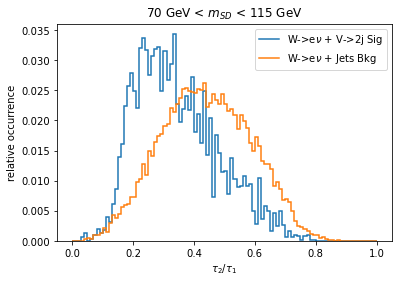

In [18]:
(h_sig_tau/h_sig_tau.sum()).plot(label="W->e$\\nu$ + V->2j Sig")
(h_bkg_tau/h_bkg_tau.sum()).plot(label = "W->e$\\nu$ + Jets Bkg")
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("$\\tau_{2}/\\tau_{1}$")
plt.ylabel("relative occurrence")
plt.legend()
plt.savefig("figures/tau_ratio.png")

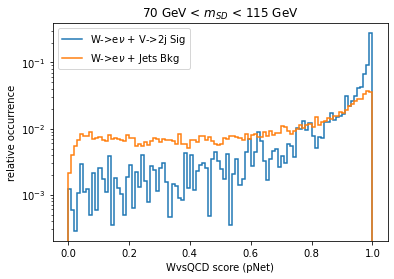

In [19]:
(h_sig_pNet/h_sig_pNet.sum()).plot(label = "W->e$\\nu$ + V->2j Sig")
(h_bkg_pNet/h_bkg_pNet.sum()).plot(label = "W->e$\\nu$ + Jets Bkg")
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("WvsQCD score (pNet)")
plt.ylabel("relative occurrence")
plt.yscale("log")
plt.legend(loc = "upper left")
plt.savefig("figures/score_pNet.png")

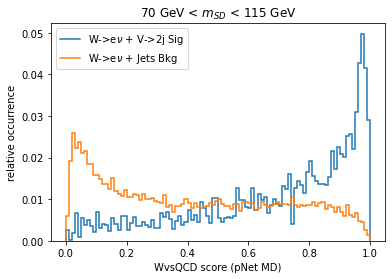

In [20]:
(h_sig_pNet_MD/h_sig_pNet_MD.sum()).plot(label = "W->e$\\nu$ + V->2j Sig")
(h_bkg_pNet_MD/h_bkg_pNet_MD.sum()).plot(label = "W->e$\\nu$ + Jets Bkg")
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("WvsQCD score (pNet MD)")
plt.ylabel("relative occurrence")
#plt.yscale("log")
plt.legend(loc = "upper left")
plt.savefig("figures/score_pNeTMD.png")

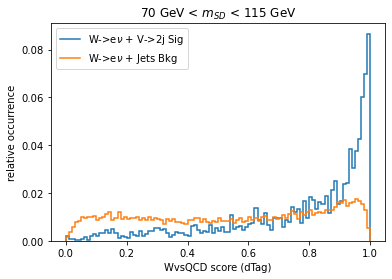

In [21]:
(h_sig_dTag/h_sig_dTag.sum()).plot(label = "W->e$\\nu$ + V->2j Sig")
(h_bkg_dTag/h_bkg_dTag.sum()).plot(label = "W->e$\\nu$ + Jets Bkg")
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("WvsQCD score (dTag)")
plt.ylabel("relative occurrence")
#plt.yscale("log")
plt.legend(loc = "upper left")
plt.savefig("figures/score_dTag.png")

In [22]:
#Initialize counters to integrate the histograms
sig_tau, bkg_tau, sig_pNet, bkg_pNet, sig_pNet_MD, bkg_pNet_MD, sig_dTag, bkg_dTag = [0, 0, 0, 0, 0, 0, 0, 0]
#Initialize lists to store the values of the integration
x_sig_tau = [] #signal t_ratio
y_bkg_tau = [] #background t_ratio
x_sig_pNet = [] #signal pNet
y_bkg_pNet = [] #background pNet
x_sig_pNet_MD = [] #signal pNet_MD
y_bkg_pNet_MD = [] #background pNet_MD
x_sig_dTag = [] #signal dTag
y_bkg_dTag = [] #background dTag
y_ratio_tau = [] #signal to square background ratio t_ratio
y_ratio_pNet = [] #signal to square background ratio pNet
y_ratio_pNet_MD = [] #signal to square background ratio pNet_MD
y_ratio_dTag = [] #signal to square background ratio dTag

#Loop over the bins of the histograms to integrate
for j in range(len(h_sig_tau.counts().flatten())): #len(h_sig_tau.counts().flatten()) is the number of bins of the histograms 
    sig_tau = sig_tau + h_sig_tau.counts().flatten()[j]
    bkg_tau = bkg_tau + h_bkg_tau.counts().flatten()[j]
    x_sig_tau.append(sig_tau/h_sig_tau.sum())
    y_bkg_tau.append(bkg_tau/h_bkg_tau.sum())
    if bkg_tau != 0: y_ratio_tau.append(sig_tau/math.sqrt(bkg_tau))
    elif bkg_tau == 0: y_ratio_tau.append(0)
    #For pNet and dTag, I integrate from the upper edge
    l=(len(h_sig_pNet.counts().flatten())-1)-j #Attention, the last bin is nbin-1!
    sig_pNet = sig_pNet + h_sig_pNet.counts().flatten()[l]
    bkg_pNet = bkg_pNet + h_bkg_pNet.counts().flatten()[l]
    sig_pNet_MD = sig_pNet_MD + h_sig_pNet_MD.counts().flatten()[l]
    bkg_pNet_MD = bkg_pNet_MD + h_bkg_pNet_MD.counts().flatten()[l]
    sig_dTag = sig_dTag + h_sig_dTag.counts().flatten()[l]
    bkg_dTag = bkg_dTag + h_bkg_dTag.counts().flatten()[l]
    x_sig_pNet.append(sig_pNet/h_sig_pNet.sum())
    y_bkg_pNet.append(bkg_pNet/h_bkg_pNet.sum())
    x_sig_pNet_MD.append(sig_pNet_MD/h_sig_pNet_MD.sum())
    y_bkg_pNet_MD.append(bkg_pNet_MD/h_bkg_pNet_MD.sum())
    x_sig_dTag.append(sig_dTag/h_sig_dTag.sum())
    y_bkg_dTag.append(bkg_dTag/h_bkg_dTag.sum())
    if bkg_pNet != 0: y_ratio_pNet.append(sig_pNet/math.sqrt(bkg_pNet))
    elif bkg_pNet == 0: y_ratio_pNet.append(0)
    if bkg_pNet_MD != 0: y_ratio_pNet_MD.append(sig_pNet_MD/math.sqrt(bkg_pNet_MD))
    elif bkg_pNet_MD == 0: y_ratio_pNet_MD.append(0)
    if bkg_dTag != 0: y_ratio_dTag.append(sig_dTag/math.sqrt(bkg_dTag))
    elif bkg_dTag == 0: y_ratio_dTag.append(0)

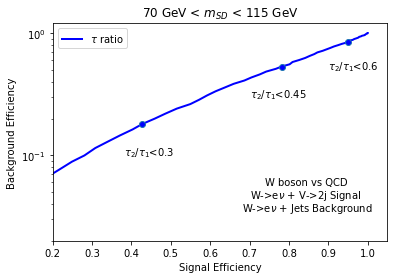

In [23]:
#Plotting the results in a graph
plt.plot(x_sig_tau, y_bkg_tau, label= "$\\tau$ ratio", color='blue', linestyle='solid', linewidth = 2)
         #marker='o', markerfacecolor='blue', markersize=6)
plt.plot([x_sig_tau[29],x_sig_tau[44],x_sig_tau[59]], [y_bkg_tau[29],y_bkg_tau[44],y_bkg_tau[59]], linestyle='None', marker='o', markerfacecolor='blue', markersize=6)

plt.xlim([0.2, 1.05])
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("Signal Efficiency")
plt.ylim([0.02, 1.2])
plt.yscale("log")
plt.ylabel("Background Efficiency")
plt.text(0.7,0.3,"$\\tau_{2}/\\tau_{1}$<0.45")
plt.text(0.38,0.1,"$\\tau_{2}/\\tau_{1}$<0.3")
plt.text(0.9,0.5,"$\\tau_{2}/\\tau_{1}$<0.6")
plt.text(0.74,0.057,"W boson vs QCD")
plt.text(0.7,0.045,"W->e$\\nu$ + V->2j Signal")
plt.text(0.68,0.035,"W->e$\\nu$ + Jets Background")
plt.legend()
plt.savefig("figures/eff_tau.png")

0.7811155394167377 0.5322770789828906
0.843222746340612 0.5308695393223923


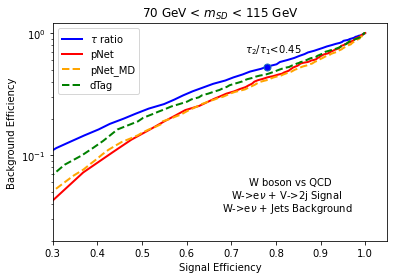

In [24]:
#Plotting the results in a graph
plt.plot(x_sig_tau, y_bkg_tau, label= "$\\tau$ ratio", color='blue', linestyle='solid', linewidth = 2)
         #marker='o', markerfacecolor='blue', markersize=6)
plt.plot(x_sig_pNet, y_bkg_pNet, label= "pNet", color='red', linestyle='solid', linewidth = 2)
         #marker='o', markerfacecolor='red', markersize=6)
plt.plot(x_sig_pNet_MD, y_bkg_pNet_MD, label= "pNet_MD", color='orange', linestyle='dashed', linewidth = 2)
         #marker='o', markerfacecolor='orange', markersize=6)
plt.plot(x_sig_dTag, y_bkg_dTag, label= "dTag", color='green', linestyle='dashed', linewidth = 2)
         #marker='o', markerfacecolor='green', markersize=6)
plt.plot(x_sig_tau[44], y_bkg_tau[44], marker='o', markerfacecolor='blue', markersize=7)
plt.xlim([0.3, 1.05])
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("Signal Efficiency")
plt.ylim([0.02, 1.2])
plt.yscale("log")
plt.ylabel("Background Efficiency")
plt.text(0.73,0.7,"$\\tau_{2}/\\tau_{1}$<0.45")
plt.text(0.74,0.057,"W boson vs QCD")
plt.text(0.7,0.045,"W->e$\\nu$ + V->2j Signal")
plt.text(0.68,0.035,"W->e$\\nu$ + Jets Background")
plt.legend()
plt.savefig("figures/efficiency.png")
print(x_sig_tau[44], y_bkg_tau[44])
print(x_sig_pNet[31], y_bkg_pNet[31])

0.8569896499006358
0.9486971130654197


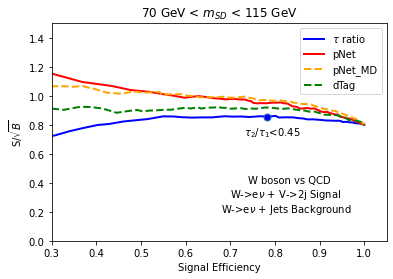

In [25]:
print(y_ratio_tau[44])
print(y_ratio_pNet[21])
#Plotting the results in a graph
plt.plot(x_sig_tau, y_ratio_tau, label= "$\\tau$ ratio", color='blue', linestyle='solid', linewidth = 2)
         #marker='o', markerfacecolor='blue', markersize=6)
plt.plot(x_sig_pNet, y_ratio_pNet, label= "pNet", color='red', linestyle='solid', linewidth = 2)
         #marker='o', markerfacecolor='red', markersize=6)
plt.plot(x_sig_pNet_MD, y_ratio_pNet_MD, label= "pNet_MD", color='orange', linestyle='dashed', linewidth = 2)
         #marker='o', markerfacecolor='orange', markersize=6)
plt.plot(x_sig_dTag, y_ratio_dTag, label= "dTag", color='green', linestyle='dashed', linewidth = 2)
         #marker='o', markerfacecolor='green', markersize=6)
plt.plot(x_sig_tau[44], y_ratio_tau[44], marker='o', markerfacecolor='blue', markersize=7)
plt.title("70 GeV < $m_{SD}$ < 115 GeV")
plt.xlabel("Signal Efficiency")
plt.xlim([0.3, 1.05])
plt.ylim([0., 1.5])
#plt.yscale("log")
plt.ylabel("S/$\sqrt{B}$")
plt.text(0.73,0.73,"$\\tau_{2}/\\tau_{1}$<0.45")
plt.text(0.74,0.4,"W boson vs QCD")
plt.text(0.7,0.3,"W->e$\\nu$ + V->2j Signal")
plt.text(0.68,0.2,"W->e$\\nu$ + Jets Background")
plt.legend()
plt.savefig("figures/sensitivity.png")